In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [3]:
# 1. Carregar o dataset aac_intakes_outcomes.csv (substitua pelo caminho correto no Colab)
df = pd.read_csv('/content/aac_intakes_outcomes.csv', on_bad_lines='skip')


In [4]:
# 2. Limpeza e preparação dos dados
# Remover colunas irrelevantes
df = df.drop(columns=['animal_id_outcome', 'outcome_subtype', 'outcome_datetime', 'found_location',
                      'outcome_monthyear', 'date_of_birth', 'dob_monthyear', 'intake_datetime', 'intake_monthyear'])


In [5]:
# Criando a variável alvo: 'adopted'
df['adopted'] = df['outcome_type'].apply(lambda x: 1 if x == 'Adoption' else 0)


In [6]:
# 3. Selecionar colunas de interesse e remover valores nulos
# Adicionamos a coluna time_in_shelter_days junto com outras variáveis.
selected_columns = ['age_upon_intake_(years)', 'intake_condition', 'animal_type', 'breed',
                    'color', 'sex_upon_intake', 'time_in_shelter_days', 'adopted']
df.head()

,age_upon_outcome,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_weekday,outcome_hour,...,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_year,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,adopted
0,10 years,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",12,2017,Thursday,0,...,10.0,"(7.5, 10.0]",12,2017,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,0
1,7 years,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",12,2014,Saturday,16,...,7.0,"(5.0, 7.5]",12,2014,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,0
2,6 years,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",3,2014,Saturday,17,...,6.0,"(5.0, 7.5]",3,2014,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,0
3,10 years,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",4,2014,Monday,15,...,10.0,"(7.5, 10.0]",4,2014,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,0
4,16 years,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",11,2013,Saturday,11,...,16.0,"(15.0, 17.5]",11,2013,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,0


In [7]:
df = df[selected_columns]
df = df.dropna()

In [8]:
# 4. Convertendo variáveis categóricas em variáveis numéricas (One-Hot Encoding)
df = pd.get_dummies(df, columns=['intake_condition', 'animal_type', 'breed', 'color', 'sex_upon_intake'], drop_first=True)


In [9]:
# 5. Separando as variáveis preditoras (X) e a variável alvo (y)
X = df.drop(columns=['adopted'])
y = df['adopted']
df.head()

,age_upon_intake_(years),time_in_shelter_days,adopted,intake_condition_Feral,intake_condition_Injured,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Pregnant,intake_condition_Sick,...,color_Yellow/Gray,color_Yellow/Orange,color_Yellow/Orange Tabby,color_Yellow/Tan,color_Yellow/White,color_Yellow/Yellow,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,10.0,0.588194,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,7.0,1.259722,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,6.0,1.113889,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,10.0,4.970139,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,16.0,0.119444,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
# 6. Dividindo o conjunto de dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# 7. Lidar com o desequilíbrio de classes usando SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


In [12]:
# 8. Treinamento do modelo Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(x_train_res, y_train_res)


GradientBoostingClassifier(random_state=42)

In [13]:
# 9. Fazendo predições no conjunto de teste
y_pred_gb = model_gb.predict(x_test)


In [14]:
# 10. Avaliação do modelo
print("Relatório de Classificação - Gradient Boosting")
print(classification_report(y_test, y_pred_gb))


Relatório de Classificação - Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      0.74      0.79     13754
           1       0.70      0.84      0.76     10148

    accuracy                           0.78     23902
   macro avg       0.78      0.79      0.78     23902
weighted avg       0.79      0.78      0.78     23902



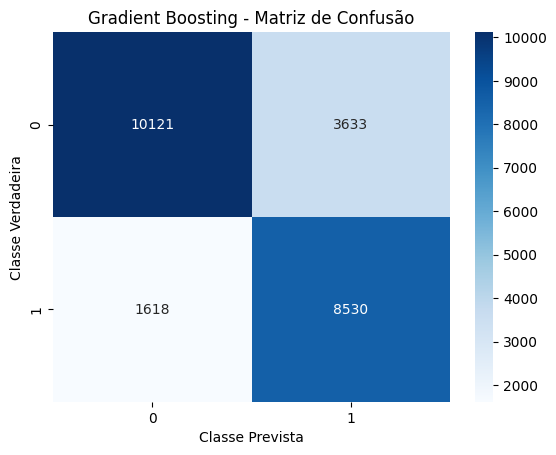

In [15]:
# 11. Exibindo a matriz de confusão
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting - Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()

In [16]:
# 12. Exibindo a acurácia do modelo
print("Acurácia - Gradient Boosting:", accuracy_score(y_test, y_pred_gb))


Acurácia - Gradient Boosting: 0.7803112710233453



Importância das Variáveis no Modelo Gradient Boosting:
1. time_in_shelter_days (0.7839)
2. age_upon_intake_(years) (0.1409)
3. intake_condition_Normal (0.0177)
4. sex_upon_intake_Unknown (0.0137)
5. animal_type_Dog (0.0107)
6. sex_upon_intake_Spayed Female (0.0084)
7. sex_upon_intake_Neutered Male (0.0057)
8. breed_Pit Bull Mix (0.0048)
9. breed_Chihuahua Shorthair Mix (0.0025)
10. intake_condition_Injured (0.0007)
11. color_Flame Point (0.0006)
12. breed_Cairn Terrier Mix (0.0005)
13. breed_Dachshund Mix (0.0005)
14. color_White (0.0005)
15. breed_Chihuahua Longhair Mix (0.0005)
16. breed_Yorkshire Terrier Mix (0.0004)
17. color_Black/Tan (0.0004)
18. color_Brown/Green (0.0003)
19. breed_Cold Water (0.0003)
20. breed_Parakeet Mix (0.0003)
21. breed_Labrador Retriever Mix (0.0003)
22. breed_Plott Hound Mix (0.0003)
23. breed_Border Terrier (0.0002)
24. breed_Siamese/Domestic Shorthair (0.0002)
25. color_White/Black (0.0002)
26. color_Lynx Point (0.0002)
27. breed_Duck Mix (0.0002)
28.

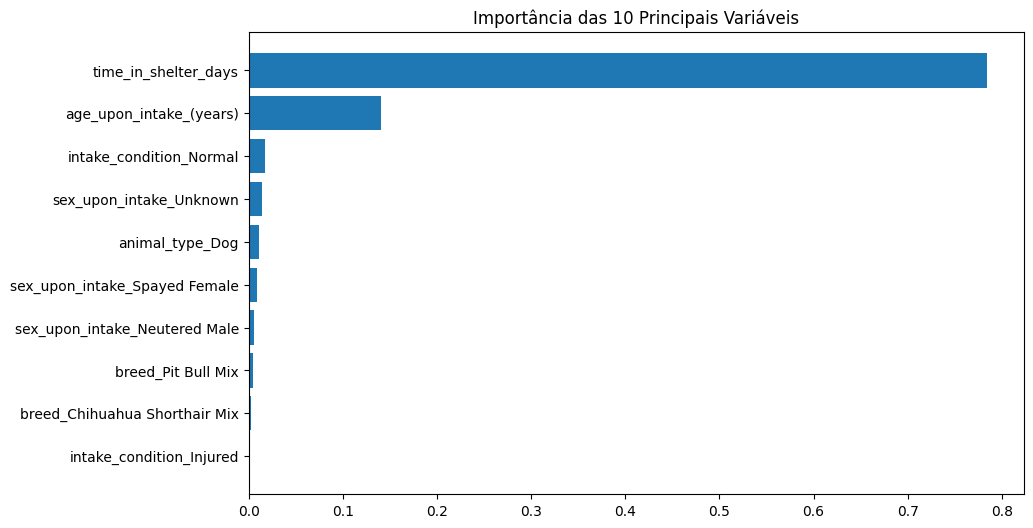

In [17]:
# 13. Exibindo a importância das variáveis (Feature Importance)
importances = model_gb.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]  # Ordenar em ordem decrescente

print("\nImportância das Variáveis no Modelo Gradient Boosting:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]:.4f})")

# Visualizando as 10 variáveis mais importantes
plt.figure(figsize=(10,6))
plt.title("Importância das 10 Principais Variáveis")
plt.barh(range(10), importances[indices[:10]], align="center")
plt.yticks(range(10), [features[i] for i in indices[:10]])
plt.gca().invert_yaxis()
plt.show()